In [2]:
# Importing the dependencies 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics




In [3]:
# laoding data from csv files 
data = pd.read_csv('car data.csv')

In [4]:
# inspecting the dataset
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
# checking the no of rows and columns
data.shape

(301, 9)

In [6]:
# getting some information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Checking the number of missing values in each of the column 
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [20]:
# checking the distribution of categorical data
print(data['Fuel_Type'].value_counts())
print(data['Seller_Type'].value_counts())
print(data['Transmission'].value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [24]:
# encoding the "fuel type, Seller_Type, Transmission"  categorical data
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}}, inplace = True)

data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace = True)

data.replace({'Transmission':{'Manual':0,'Automatic':1}}, inplace = True)






In [25]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [26]:
# Splitting the dataset into Test and Train 
x = data.drop(['Car_Name','Selling_Price'],axis = 1)
y = data.Selling_Price


In [28]:
# Traing and Testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state = 3)

## Model Training


In [30]:
# Linear Regression 
linear_Reg = LinearRegression()

In [31]:
linear_Reg.fit(x_train,y_train)

LinearRegression()

## Model Evaluation 


In [36]:
# Prediction on training data 
training_data_prediction = linear_Reg.predict(x_train)

In [38]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8849815853900536


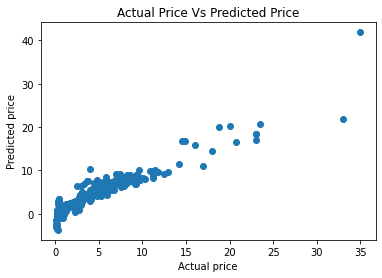

In [44]:
# Visualize the actual prices with the predicted prices 
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [40]:
# Prediction on testing data 
testing_data_prediction = linear_Reg.predict(x_test)

In [42]:
# R squared error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.7979072218427206


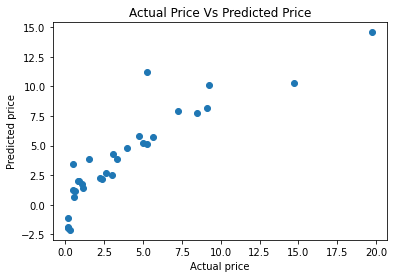

In [45]:
# Visualize the actual prices with the predicted prices 
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

## Using Lasso Regression 


In [53]:
# Linear Regression 
lasso_Reg = Lasso()

In [54]:
lasso_Reg.fit(x_train,y_train)

Lasso()

## Model Evaluation 


In [55]:
# Prediction on training data 
training_data_prediction = lasso_Reg.predict(x_train)

In [56]:
# R squared error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8469788692279795


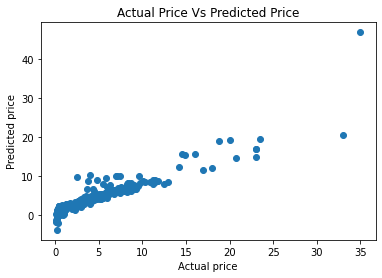

In [57]:
# Visualize the actual prices with the predicted prices 
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()

In [58]:
# Prediction on testing data 
testing_data_prediction = lasso_Reg.predict(x_test)

In [59]:
# R squared error
error_score = metrics.r2_score(y_test, testing_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.7946492652998925


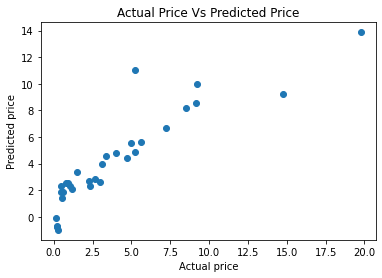

In [60]:
# Visualize the actual prices with the predicted prices 
plt.scatter(y_test, testing_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual Price Vs Predicted Price')
plt.show()